In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
data=pd.read_csv('garments_worker_productivity.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [101]:
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [102]:
data.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [103]:
data['wip'] = data['wip'].fillna(data['wip'].median())

In [104]:
data.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [ ]:
data.head()

In [ ]:
data.describe().T

In [105]:
data.duplicated().sum()

np.int64(0)

In [106]:
for i in data.select_dtypes(include=['number']).columns:
    print(data[i].value_counts())

team
8     109
2     109
4     105
1     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: count, dtype: int64
targeted_productivity
0.80    540
0.70    242
0.75    216
0.65     63
0.60     57
0.50     49
0.35     27
0.40      2
0.07      1
Name: count, dtype: int64
smv
3.94     192
2.90     108
22.52    103
30.10     79
4.15      76
        ... 
38.09      1
48.18      1
30.40      1
50.89      1
20.20      1
Name: count, Length: 70, dtype: int64
wip
1039.0    511
1282.0      4
1144.0      3
1193.0      3
1069.0      3
         ... 
817.0       1
1576.0      1
1262.0      1
953.0       1
1161.0      1
Name: count, Length: 548, dtype: int64
over_time
960     129
1440    111
6960     61
6840     48
1200     39
       ... 
5700      1
1680      1
1700      1
4680      1
3120      1
Name: count, Length: 143, dtype: int64
incentive
0       604
50      113
63       61
45       54
30       52
23       38
38       29
60       28
40       27
75       24


In [107]:
data.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [108]:
data['department'].value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

In [109]:
data['department'] = data['department'].str.strip().str.lower()


In [110]:
data['department'].value_counts()


department
sweing       691
finishing    506
Name: count, dtype: int64

In [111]:
data['date'] = pd.to_datetime(data['date'])

data['day_of_month'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['week_of_year'] = data['date'].dt.isocalendar().week.astype(int)
data['is_weekend'] = data['date'].dt.dayofweek.isin([5, 6]).astype(int)
data['is_month_start'] = data['date'].dt.is_month_start.astype(int)
data['is_month_end'] = data['date'].dt.is_month_end.astype(int)

data = data.drop(columns=['date'])
data_encoded = pd.get_dummies(data, columns=['department','day','quarter'], drop_first=True)


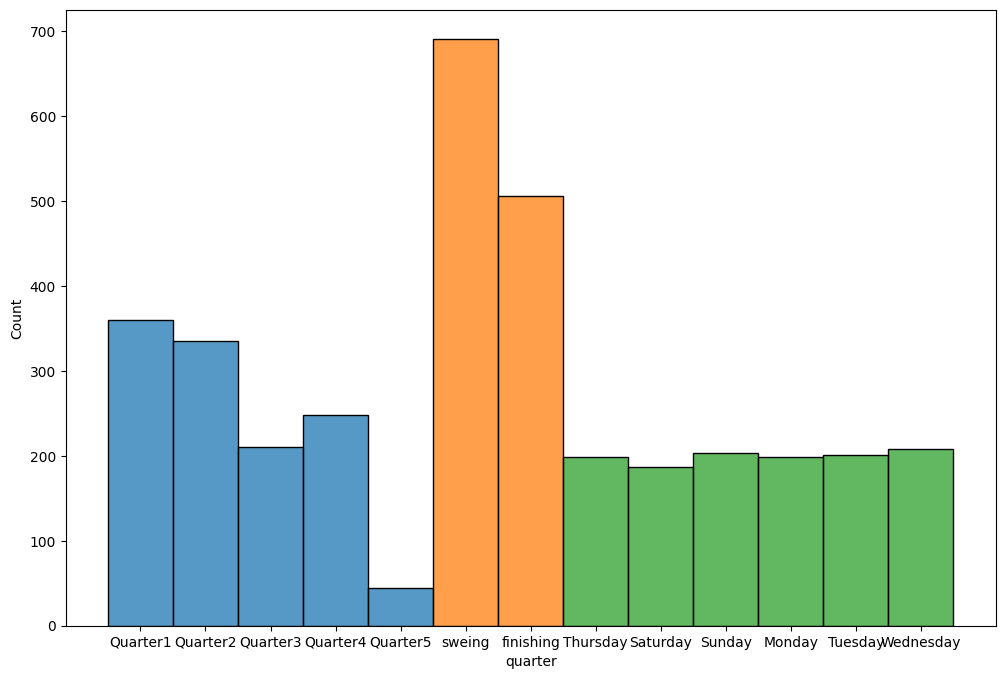

In [112]:
plt.figure(figsize=(12,8))
for col in data.select_dtypes(include=['object']).columns:
    sns.histplot(data, x=col)

<Axes: xlabel='actual_productivity', ylabel='Density'>

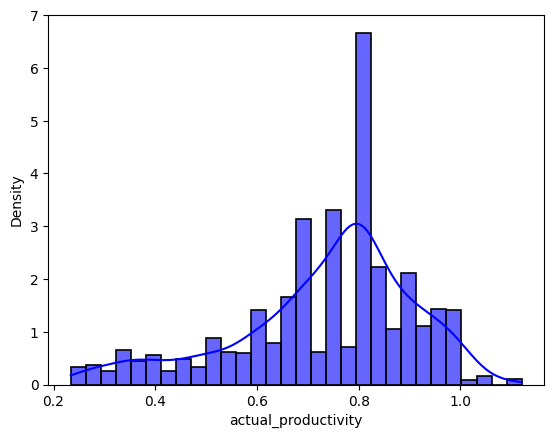

In [113]:
sns.histplot(data['actual_productivity'], kde=True, color='blue', bins=30, stat='density', label='Actual Productivity', alpha=0.6, edgecolor='black', linewidth=1.2, fill=True)

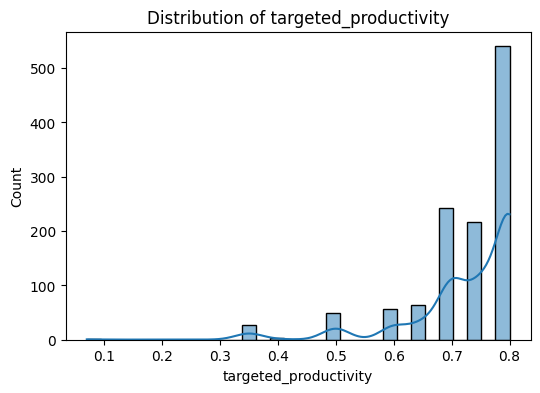

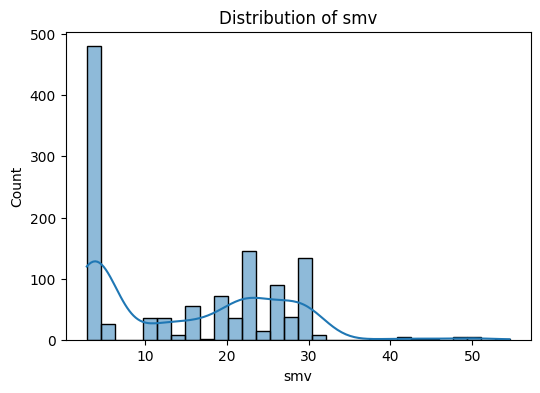

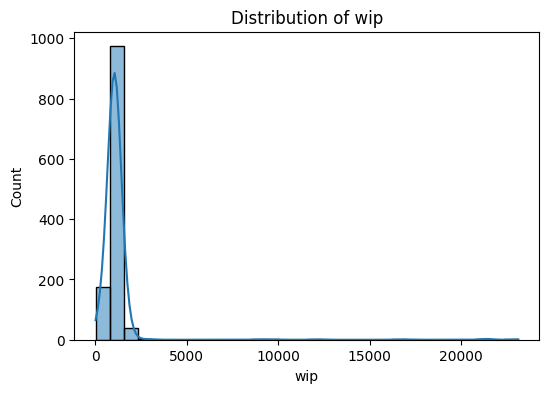

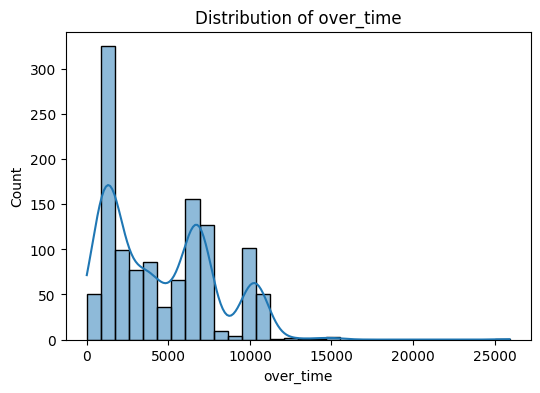

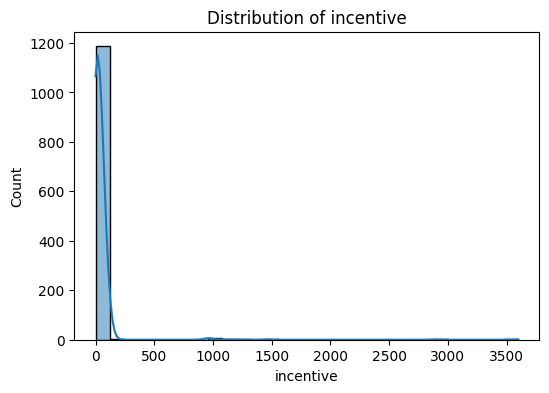

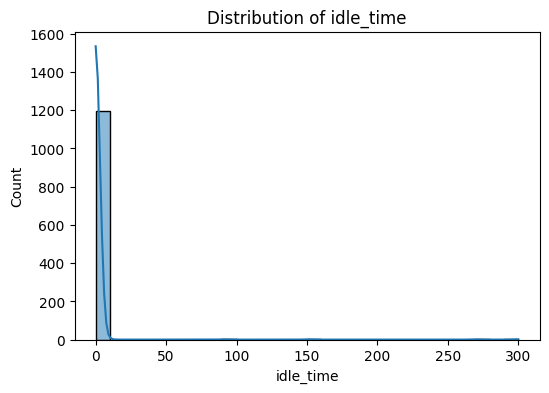

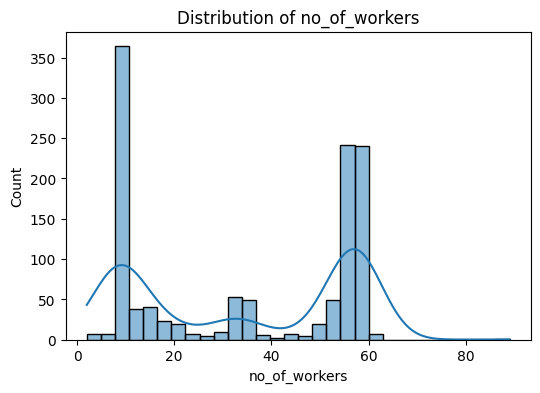

In [114]:
num_cols = ['targeted_productivity', 'smv', 'wip',
            'over_time', 'incentive', 'idle_time',
            'no_of_workers']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


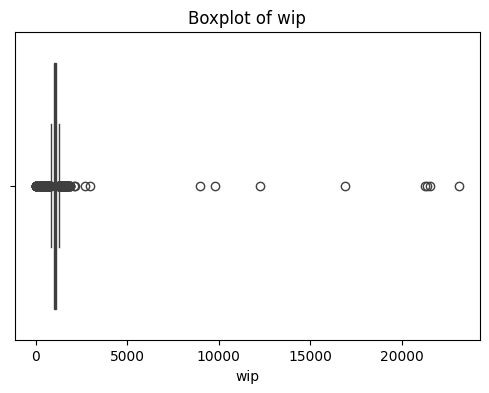

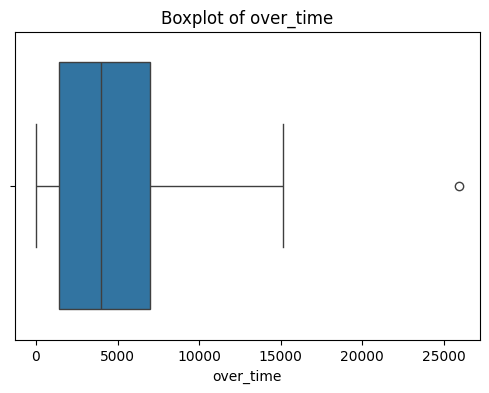

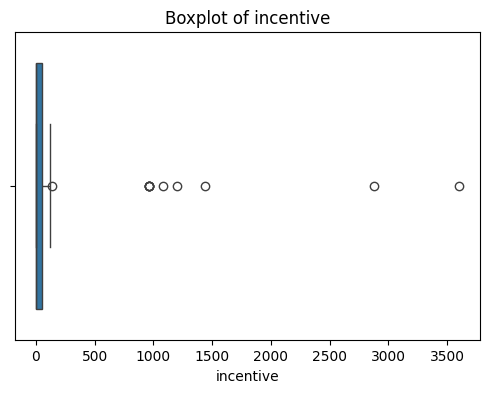

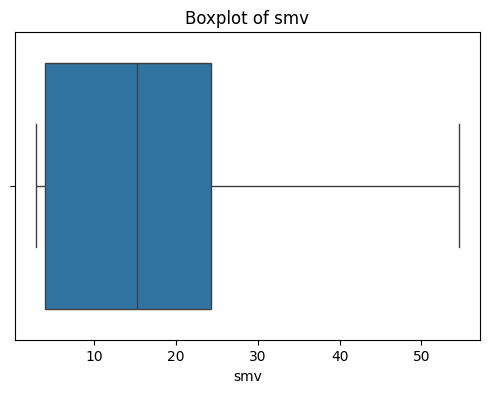

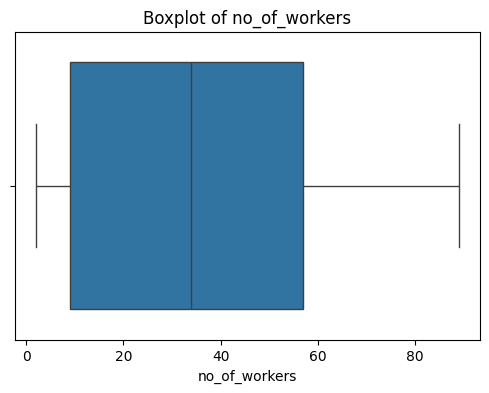

In [115]:
num_cols = ['wip', 'over_time', 'incentive', 'smv', 'no_of_workers']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


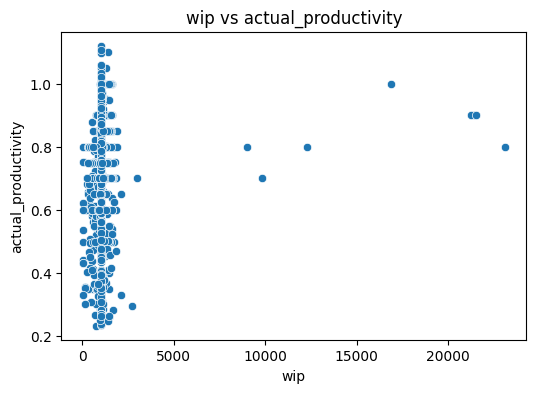

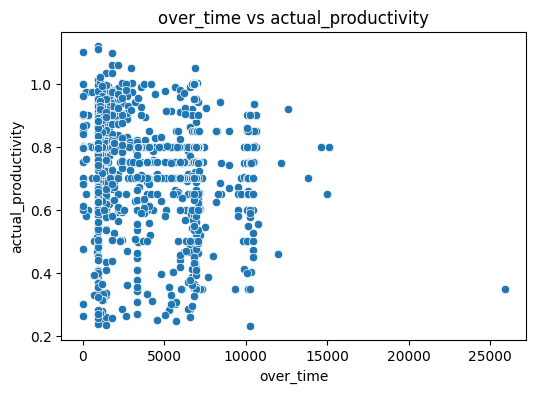

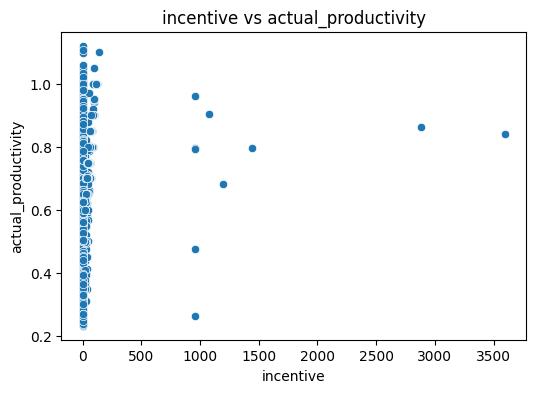

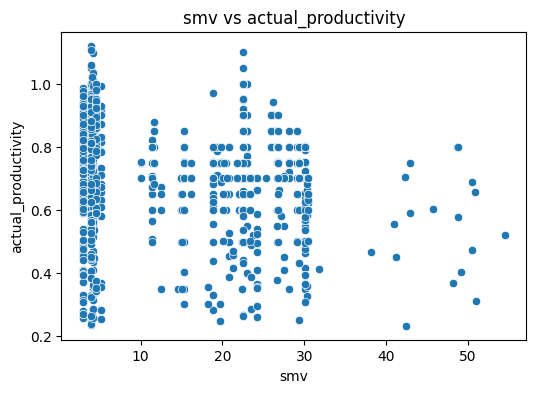

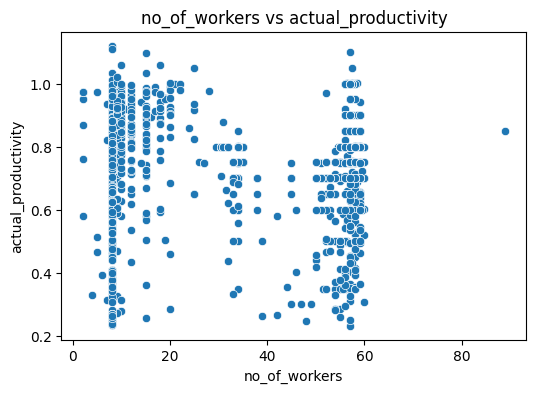

In [116]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=data[col], y=data['actual_productivity'])
    plt.title(f'{col} vs actual_productivity')
    plt.show()


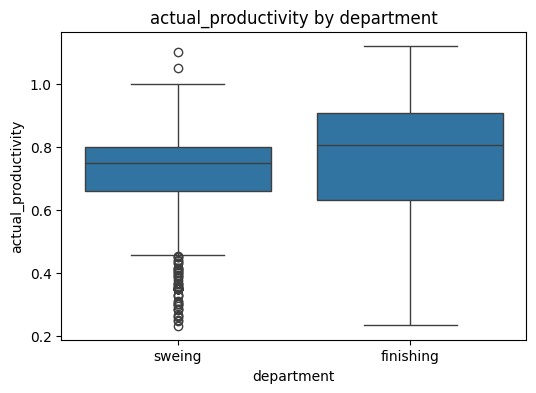

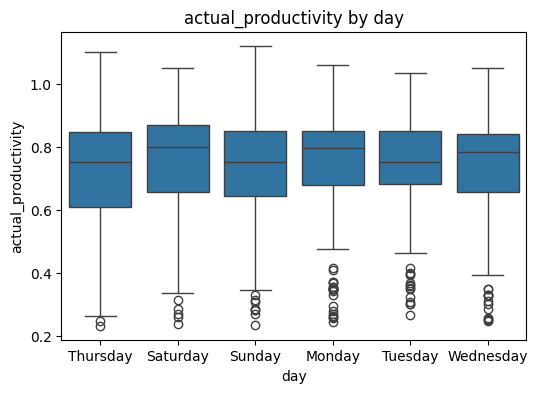

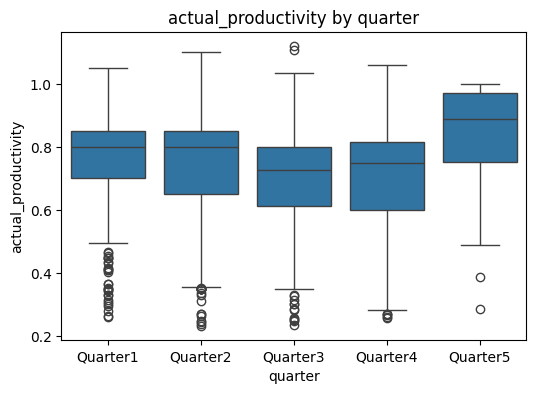

In [117]:
for col in ['department', 'day', 'quarter']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col], y=data['actual_productivity'])
    plt.title(f'actual_productivity by {col}')
    plt.show()


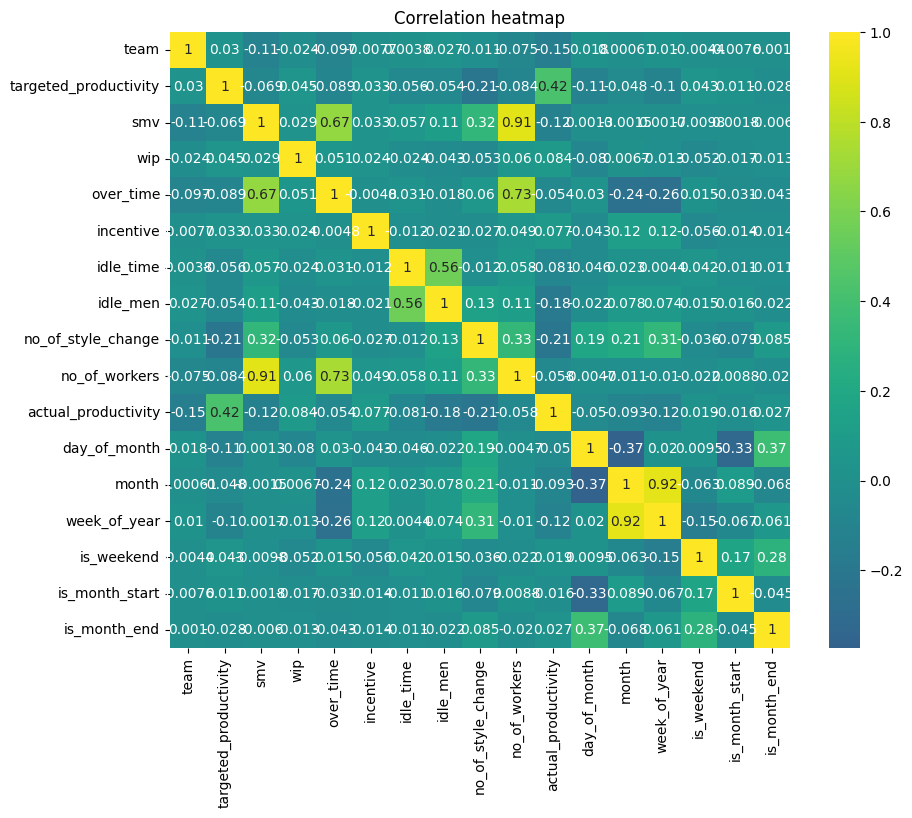

In [118]:
plt.figure(figsize=(10,8))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='viridis', center=0)
plt.title('Correlation heatmap')
plt.show()


In [119]:
from sklearn.linear_model import LinearRegression ,Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


LINEAR MODELS

-LinearRegression

In [120]:
x=data_encoded.drop(['actual_productivity'],axis=1)
y=data_encoded['actual_productivity']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.1095227245618637
Mean Squared Error: 0.022019669827081263
R-squared: 0.17071094666504383


-Ridge

In [121]:
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Ridge Regression - Mean Absolute Error: {mae_ridge}')
print(f'Ridge Regression - Mean Squared Error: {mse_ridge}')
print(f'Ridge Regression - R-squared: {r2_ridge}')


Ridge Regression - Mean Absolute Error: 0.1101679175940547
Ridge Regression - Mean Squared Error: 0.022070413937801424
Ridge Regression - R-squared: 0.1687998582667204


-Lasso

In [122]:
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso) 
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f'Lasso Regression - Mean Absolute Error: {mae_lasso}')
print(f'Lasso Regression - Mean Squared Error: {mse_lasso}')
print(f'Lasso Regression - R-squared: {r2_lasso}')

Lasso Regression - Mean Absolute Error: 0.12510321664694957
Lasso Regression - Mean Squared Error: 0.02568347637037344
Lasso Regression - R-squared: 0.03272728552256765


NON LINEAR MODELS

-DecisionTree

In [123]:
from sklearn.tree import DecisionTreeRegressor

In [124]:
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f'Decision Tree Regression - Mean Absolute Error: {mae_dt}')
print(f'Decision Tree Regression - Mean Squared Error: {mse_dt}')
print(f'Decision Tree Regression - R-squared: {r2_dt}')

Decision Tree Regression - Mean Absolute Error: 0.08348599785000002
Decision Tree Regression - Mean Squared Error: 0.021026941528795837
Decision Tree Regression - R-squared: 0.2080983696904084


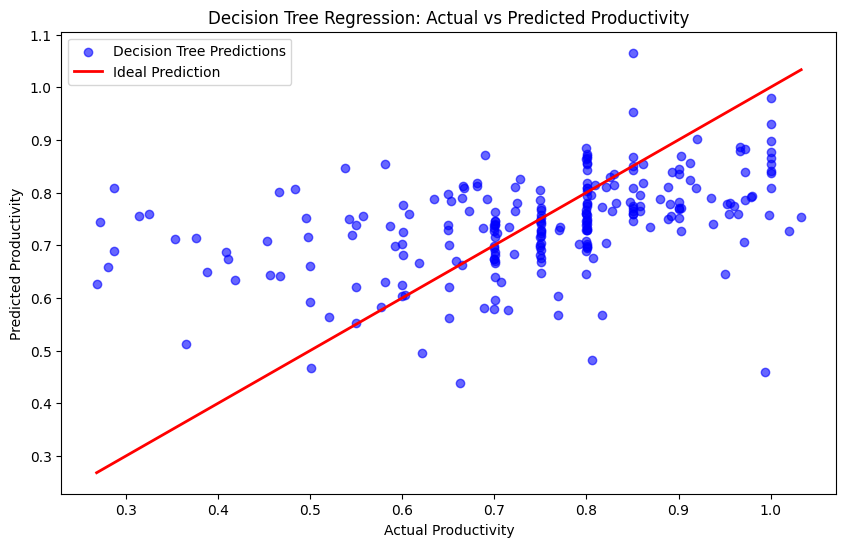

In [80]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Decision Tree Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Ideal Prediction')
plt.xlabel('Actual Productivity')
plt.ylabel('Predicted Productivity')
plt.title('Decision Tree Regression: Actual vs Predicted Productivity') 
plt.legend()
plt.show()


In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

param_grid = {
    "max_depth": [3, 5, 7, 9, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10]
}

dt = DecisionTreeRegressor(random_state=42)
grid = GridSearchCV(dt, param_grid,
                    cv=5, scoring="neg_mean_absolute_error",
                    n_jobs=-1)
grid.fit(X_train, y_train)

best_dt = grid.best_estimator_
y_pred_best_dt = best_dt.predict(X_test)
mae_best_dt = mean_absolute_error(y_test, y_pred_best_dt)
mse_best_dt = mean_squared_error(y_test, y_pred_best_dt)
r2_best_dt = r2_score(y_test, y_pred_best_dt)
print(f'Optimized Decision Tree Regression - Mean Absolute Error: {mae_best_dt}')
print(f'Optimized Decision Tree Regression - Mean Squared Error: {mse_best_dt}')
print(f'Optimized Decision Tree Regression - R-squared: {r2_best_dt}')

Optimized Decision Tree Regression - Mean Absolute Error: 0.0911773685857899
Optimized Decision Tree Regression - Mean Squared Error: 0.018942557006080978
Optimized Decision Tree Regression - R-squared: 0.2865989685278326


-RandomForest


In [126]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest Regression - Mean Absolute Error: {mae_rf}')
print(f'Random Forest Regression - Mean Squared Error: {mse_rf}')
print(f'Random Forest Regression - R-squared: {r2_rf}')

Random Forest Regression - Mean Absolute Error: 0.07029405205174998
Random Forest Regression - Mean Squared Error: 0.012310991748177033
Random Forest Regression - R-squared: 0.5363522354043646


In [127]:
rf=RandomForestRegressor( n_estimators=300,
    max_depth=None,          # or try a value like 15
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf_optimized=rf.predict(X_test)
mae_rf_optimized = mean_absolute_error(y_test, y_pred_rf_optimized)
mse_rf_optimized = mean_squared_error(y_test, y_pred_rf_optimized)
r2_rf_optimized = r2_score(y_test, y_pred_rf_optimized)
print(f'Optimized Random Forest Regression - Mean Absolute Error: {mae_rf_optimized}')
print(f'Optimized Random Forest Regression - Mean Squared Error: {mse_rf_optimized}')
print(f'Optimized Random Forest Regression - R-squared: {r2_rf_optimized}')

Optimized Random Forest Regression - Mean Absolute Error: 0.07502581767806916
Optimized Random Forest Regression - Mean Squared Error: 0.012978281766679426
Optimized Random Forest Regression - R-squared: 0.5112212360710715


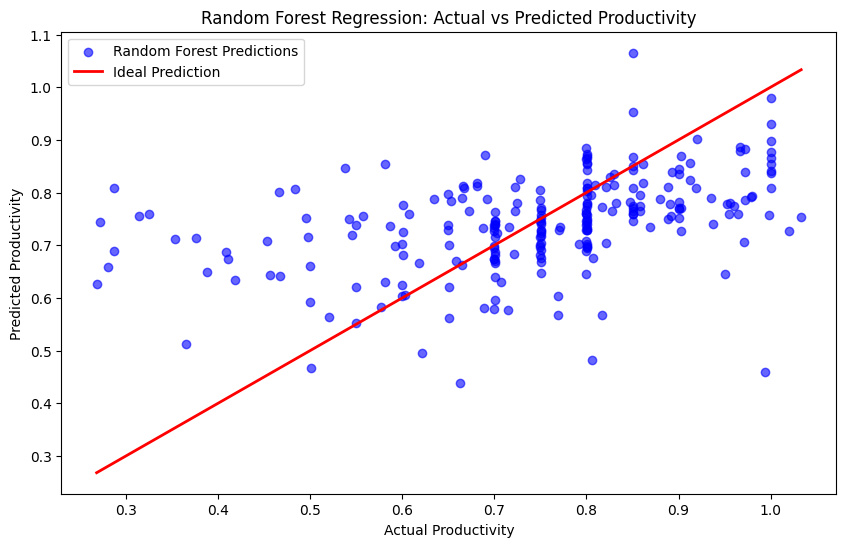

In [92]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Random Forest Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Ideal Prediction')
plt.xlabel('Actual Productivity')   
plt.ylabel('Predicted Productivity')
plt.title('Random Forest Regression: Actual vs Predicted Productivity') 
plt.legend()
plt.show()

In [128]:
importances = model_rf.feature_importances_          
feature_names = X_train.columns

feat_imp = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feat_imp.head(15))

                  feature  importance
1   targeted_productivity    0.228068
2                     smv    0.117443
5               incentive    0.105398
0                    team    0.089242
9           no_of_workers    0.087572
10           day_of_month    0.080837
4               over_time    0.068172
12           week_of_year    0.048546
3                     wip    0.033996
24       quarter_Quarter4    0.016163
21          day_Wednesday    0.015025
7                idle_men    0.011633
23       quarter_Quarter3    0.010647
18             day_Sunday    0.010373
22       quarter_Quarter2    0.009993


C:\Users\srees\AppData\Local\Temp\ipykernel_26704\3286923922.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


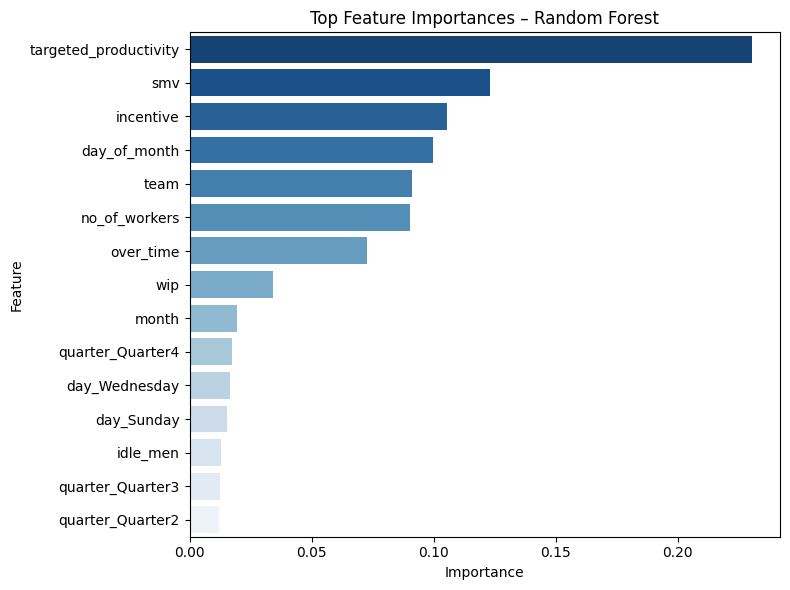

In [94]:
top_k = 15
plt.figure(figsize=(8,6))
sns.barplot(
    data=feat_imp.head(top_k),
    x='importance',
    y='feature',
    palette='Blues_r'
)
plt.title('Top Feature Importances – Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [129]:

from sklearn.model_selection import RandomizedSearchCV

rf_base = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)

param_dist = {
    "n_estimators": [100, 200, 400, 600],
    "max_depth": [None, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", 0.5]
}

rand_search = RandomizedSearchCV(
    rf_base,
    param_distributions=param_dist,
    n_iter=25,                 # number of random combos
    cv=5,
    scoring="neg_mean_absolute_error",
    random_state=42,
    n_jobs=-1
)

rand_search.fit(X_train, y_train)

print("Best params (random search):", rand_search.best_params_)
best_rf_random = rand_search.best_estimator_

y_pred = best_rf_random.predict(X_test)
print("RandomSearch RF  MAE:", mean_absolute_error(y_test, y_pred),
      "R2:", r2_score(y_test, y_pred))


Best params (random search): {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': None}
RandomSearch RF  MAE: 0.07188682503199996 R2: 0.5219126773944541


In [96]:
from sklearn.model_selection import GridSearchCV

best_params = rand_search.best_params_

param_grid = {
    "n_estimators": [best_params["n_estimators"] - 100,
                     best_params["n_estimators"],
                     best_params["n_estimators"] + 100],
    "max_depth": [best_params["max_depth"],
                  None if best_params["max_depth"] is None else best_params["max_depth"] + 5],
    "min_samples_split": [best_params["min_samples_split"],
                          max(2, best_params["min_samples_split"] - 3),
                          best_params["min_samples_split"] + 3],
    "min_samples_leaf": [best_params["min_samples_leaf"],
                         max(1, best_params["min_samples_leaf"] - 1),
                         best_params["min_samples_leaf"] + 1],
    "max_features": [best_params["max_features"]]
}

# Clean grid (remove invalid options like negative n_estimators)
param_grid["n_estimators"] = [n for n in param_grid["n_estimators"] if n >= 50]

rf_for_grid = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)

grid = GridSearchCV(
    rf_for_grid,
    param_grid=param_grid,
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best params (grid):", grid.best_params_)
best_rf_grid = grid.best_estimator_

y_pred_grid = best_rf_grid.predict(X_test)
print("GridSearch RF  MAE:", mean_absolute_error(y_test, y_pred_grid),
      "R2:", r2_score(y_test, y_pred_grid))


Best params (grid): {'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 600}
GridSearch RF  MAE: 0.07069607737765309 R2: 0.5304718800338534


In [130]:
# avoid division by zero
data['workers_per_smv'] = data['no_of_workers'] / data['smv']

data['overtime_per_worker'] = data['over_time'] / data['no_of_workers'].replace(0, np.nan)
data['overtime_per_worker'] = data['overtime_per_worker'].fillna(0)

data['incentive_per_worker'] = data['incentive'] / data['no_of_workers'].replace(0, np.nan)
data['incentive_per_worker'] = data['incentive_per_worker'].fillna(0)


In [131]:
for col in ['wip', 'over_time', 'incentive']:
    upper = data[col].quantile(0.995)
    data[col] = data[col].clip(upper=upper)


C:\Users\srees\AppData\Local\Temp\ipykernel_26704\2646052890.py:3: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].clip(upper=upper)


In [132]:
data_enc = pd.get_dummies(
    data,
    columns=['quarter', 'department', 'day'],
    drop_first=True
)

X = data_enc.drop('actual_productivity', axis=1)
y = data_enc['actual_productivity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest Regression - Mean Absolute Error: {mae_rf}')
print(f'Random Forest Regression - Mean Squared Error: {mse_rf}')
print(f'Random Forest Regression - R-squared: {r2_rf}')

Random Forest Regression - Mean Absolute Error: 0.06984468919499999
Random Forest Regression - Mean Squared Error: 0.012304330712348713
Random Forest Regression - R-squared: 0.5366030985707825


GradientBoost

In [133]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.03,
    max_depth=3,
    random_state=42
)

gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("GBR MAE :", mean_absolute_error(y_test, y_pred_gb))
print("GBR MSE :", mean_squared_error(y_test, y_pred_gb))
print("GBR R2  :", r2_score(y_test, y_pred_gb))


GBR MAE : 0.07730197983635631
GBR MSE : 0.013803848444117573
GBR R2  : 0.48012933443158556


XGboost

In [135]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGB MAE :", mean_absolute_error(y_test, y_pred_xgb))
print("XGB MSE :", mean_squared_error(y_test, y_pred_xgb))
print("XGB R2  :", r2_score(y_test, y_pred_xgb))


XGB MAE : 0.07816012253281751
XGB MSE : 0.015025245222447501
XGB R2  : 0.4341299626879698


In [137]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

lgb.fit(X_train, y_train)
y_pred_lgb = lgb.predict(X_test)

print("LGBM MAE :", mean_absolute_error(y_test, y_pred_lgb))
print("LGBM MSE :", mean_squared_error(y_test, y_pred_lgb))
print("LGBM R2  :", r2_score(y_test, y_pred_lgb))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 957, number of used features: 27
[LightGBM] [Info] Start training from score 0.732472
LGBM MAE : 0.07845408459212909
LGBM MSE : 0.015051338982526585
LGBM R2  : 0.4331472381619499


FINAL AND BEST MODEL - RANDOMFOREST

In [138]:
import joblib

final_model = model_rf   # or whatever your best RF variable is
feature_names = list(X_train.columns)

joblib.dump(final_model, "rf_productivity_model.joblib")
joblib.dump(feature_names, "rf_productivity_features.joblib")


['rf_productivity_features.joblib']